In [17]:
#Importing Libraries
try:
    import numpy as np
    import tensorflow as tf
    import matplotlib.pyplot as plt
    import cv2
    import os
    print('----Libraries Loaded----')
except:
    print("----Libraries Not Loaded----")

----Libraries Loaded----


In [18]:
os.chdir(r'C:\Users\HP\OneDrive\Desktop\Hand_Gesture_Recognition')
os.listdir()  #path where file is present
#warnings.filterwarnings("ignore")   #remove warnings
print("----Folder Loaded----")
os.listdir()

----Folder Loaded----


['.ipynb_checkpoints',
 'dataset',
 'Hand_Gesture_recognition.ipynb',
 'trained_model.h5',
 'training_hist.json',
 'Untitled.ipynb']

In [34]:
#Loading Model
cnn=tf.keras.models.load_model("C:/Users/HP/OneDrive/Desktop/Hand_Gesture_Recognition/trained_model.h5")

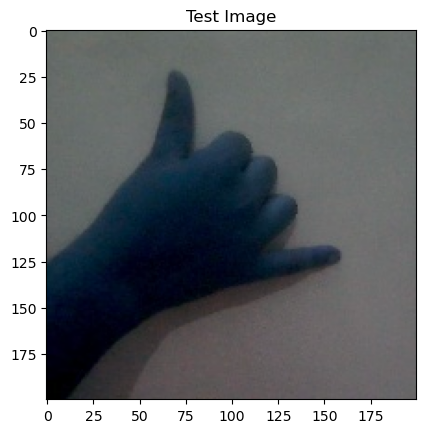

In [35]:
#Performing Predictions
img_path="C:/Users/HP/OneDrive/Desktop/Hand_Gesture_Recognition/dataset/test2/CallMe/CallMe03.jpg"
img=cv2.imread(img_path)
plt.imshow(img)
plt.title("Test Image")
plt.show()

In [36]:
image=tf.keras.preprocessing.image.load_img(img_path,target_size=(64,64))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
predictions=cnn.predict([input_arr])

1/1 [==============================] - 1s 928ms/step


In [37]:
print(predictions)

[[0. 1. 0. 0. 0. 0. 0. 0.]]


In [38]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'C:/Users/HP/OneDrive/Desktop/Hand_Gesture_Recognition/dataset/test2',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 80 files belonging to 8 classes.


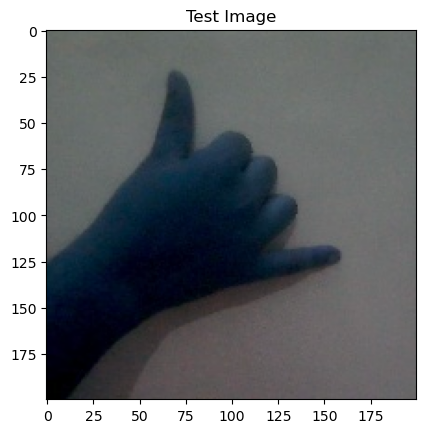

That is a gesture of CallMe


In [39]:
result_index=np.where(predictions[0]==max(predictions[0]))
plt.imshow(img)
plt.title("Test Image")
plt.show()
print("That is a gesture of {}".format(test_set.class_names[result_index[0][0]]))